In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get metrics from various models

In [21]:
# Get linear regression metrics
EN_data = pd.read_csv("model_output/elastic_net_results.csv")
LR_r2 = EN_data.loc[EN_data['TARGET'] == 'flights_ontime', 'R2'].values[0]
LR_mae = EN_data.loc[EN_data['TARGET'] == 'flights_ontime', 'MAE'].values[0]
LR_mse = EN_data.loc[EN_data['TARGET'] == 'flights_ontime', 'MSE'].values[0]
LR_mape = EN_data.loc[EN_data['TARGET'] == 'flights_ontime', 'MAPE'].values[0]

# Get dense neural network metrics
DNN_data = pd.read_csv("model_output/dense_nn_results.csv")
DNN_1N_r2 = DNN_data.query("model == 'OneNeuron_LR'")['r2'].values[0]
DNN_1N_mae = DNN_data.query("model == 'OneNeuron_LR'")['mae'].values[0]
DNN_1N_mse = DNN_data.query("model == 'OneNeuron_LR'")['mse'].values[0]
DNN_1N_mape = DNN_data.query("model == 'OneNeuron_LR'")['mape'].values[0]

# Get time series metrics
TS_data = pd.read_csv("model_output/TimeSeries_results.csv")
LSTM7_mae = TS_data.query("model == 'LSTM7' and library == 'Keras'")['MAE'].values[0]
LSTM7_mse = TS_data.query("model == 'LSTM7' and library == 'Keras'")['MSE'].values[0]
LSTM7_mape = TS_data.query("model == 'LSTM7' and library == 'Sklearn'")['MAPE'].values[0]


### Sort models and metrics for plotting

In [22]:
# Metric lists
r2 = [LR_r2, DNN_1N_r2]
mae = [LR_mae, DNN_1N_mae, LSTM7_mae]
mse = [LR_mse, DNN_1N_mse, LSTM7_mse]
mape = [LR_mape, DNN_1N_mape, LSTM7_mape]

# Sort models and R^2 by R^2
sorted_indices_r2 = np.argsort(r2)[::-1]
sorted_models_r2 = [models[i] for i in sorted_indices_r2]
sorted_r2 = [r2[i] for i in sorted_indices_r2]

# Sort models and MAE by MAE
sorted_indices_mae = np.argsort(mae)
sorted_models_mae = [models[i] for i in sorted_indices_mae]
sorted_mae = [mae[i] for i in sorted_indices_mae]

# Sort models and MSE by MSE
sorted_indices_mse = np.argsort(mse)
sorted_models_mse = [models[i] for i in sorted_indices_mse]
sorted_mse = [mse[i] for i in sorted_indices_mse]

# Sort models and MAPE by MAPE
sorted_indices_mape = np.argsort(mape)
sorted_models_mape = [models[i] for i in sorted_indices_mape]
sorted_mape = [mape[i] for i in sorted_indices_mape]

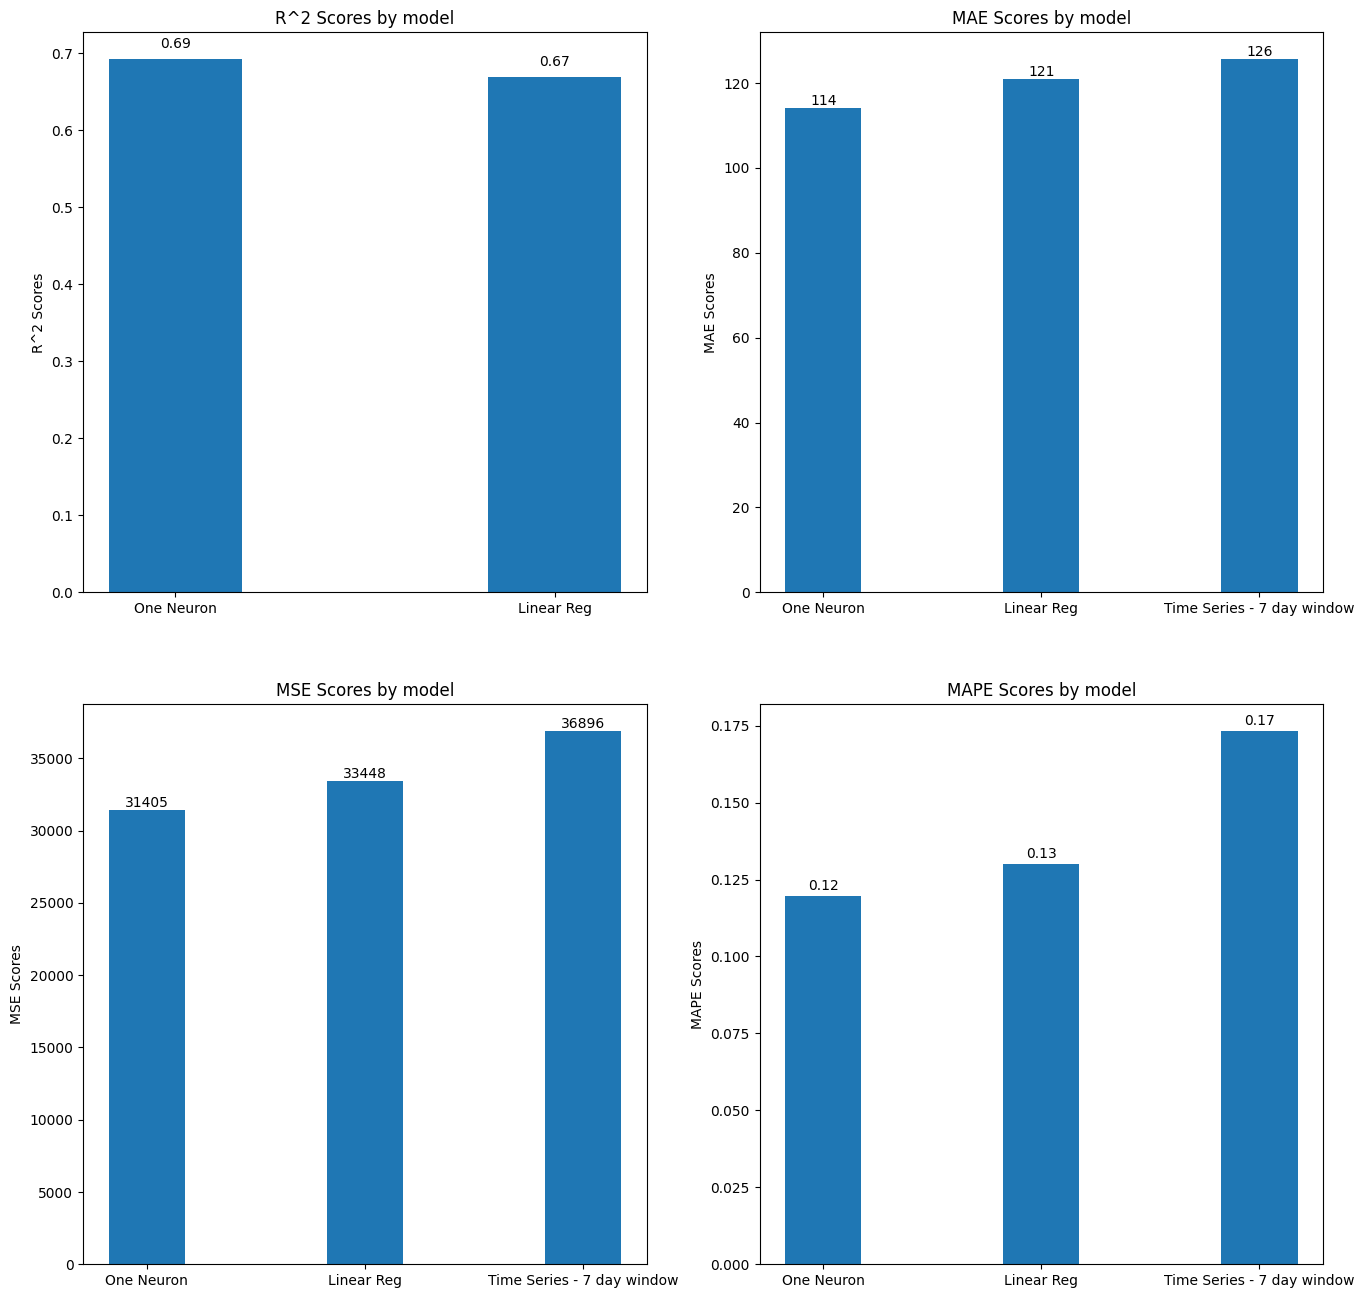

In [24]:
# Plot
models = ['Linear Reg', 'One Neuron', 'Time Series - 7 day window']
x = np.arange(len(models))
bar_width = 0.35
fix, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# R^2
bars_r2 = axes[0,0].bar(np.arange(2), sorted_r2, bar_width, label='R^2')
# axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R^2 Scores')
axes[0,0].set_title('R^2 Scores by model')
axes[0,0].set_xticks(np.arange(2))
axes[0,0].set_xticklabels(sorted_models_r2)

# Add values above R^2 bars
for bar, value in zip(bars_r2, sorted_r2):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{value:.2f}', ha='center', va='bottom')

# MAE
bars_mae = axes[0,1].bar(x, sorted_mae, bar_width, label='MAE')
# axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('MAE Scores')
axes[0,1].set_title('MAE Scores by model')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(sorted_models_mae)

# Add values above MAE bars
for bar, value in zip(bars_mae, sorted_mae):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{value:.0f}', ha='center', va='bottom')

# MSE
bar_mse = axes[1,0].bar(x, sorted_mse, bar_width, label='MSE')
# axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('MSE Scores')
axes[1,0].set_title('MSE Scores by model')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(sorted_models_mse)

# Add values above MSE bars
for bar, value in zip(bar_mse, sorted_mse):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{value:.0f}', ha='center', va='bottom')

# MAPE
bar_mape = axes[1,1].bar(x, sorted_mape, bar_width, label='MAPE')
# axes[1,1].set_xlabel('Models')
axes[1,1].set_ylabel('MAPE Scores')
axes[1,1].set_title('MAPE Scores by model')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(sorted_models_mape)

# Add values above MAPE bars
for bar, value in zip(bar_mape, sorted_mape):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width() / 2, height + 0.001, f'{value:.2f}', ha='center', va='bottom')
    

plt.tight_layout
plt.show()